In [1]:
import pandas as pd
import geopandas as gpd
import descartes
from matplotlib import pyplot
import mapclassify as mc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import adjustText as aT

In [2]:
#function that reads in GeoJSON files and csv data, and returns a merged dataframe
#input parameter is str state name (or india for full map)--json and csv need to be named the same thing
def combine(state):  
    geo = gpd.read_file('maps/{}.json'.format(state)) #reading in json 
    df = pd.read_csv('csvs/{}.csv'.format(state), names = ['district', 'R', 'Rproj'], skiprows = 1) #reading in csv
    merged = geo.merge(df, on='district', how='left') #merge into gdf (with all districts)
    return merged

In [50]:
def rmap(merged, color='OrRd',vmin=0, vmax=15):
    #setting up figure
    name = merged.iloc[0]['st_nm'] 
    fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize=(24,12))
    fig.suptitle('{} R by District'.format(name))
    
    #plotting left subplot
    merged.plot(ax=ax1, column='R', cmap=color, vmin=vmin, vmax=vmax, missing_kwds={'color':'lightgrey'}, edgecolor='grey', linewidth=.5)
    ax1.set_title('Current')
    ax1.set_xticks([])
    ax1.set_yticks([])
    #adding district names
    merged["center"] = merged["geometry"].centroid
    merged_points1 = merged.copy()
    merged_points1.set_geometry("center", inplace = True)
    for x1, y1, label1, r1 in zip(merged_points1.geometry.x, merged_points1.geometry.y, merged_points1["district"], merged_points1['R']):
        ax1.text(x1, y1, str(label1+': '+str(round(r1,2))), fontsize = 8, horizontalalignment='center')


    
    #plotting right subplot
    merged.plot(ax=ax2, column='Rproj', cmap=color, vmin=vmin, vmax=vmax, missing_kwds={'color':'lightgrey'}, edgecolor='grey', linewidth=.5)
    ax2.set_title('Projected')
    ax2.set_xticks([])
    ax2.set_yticks([])
    #adding district names
    merged["center"] = merged["geometry"].centroid
    merged_points2 = merged.copy()
    merged_points2.set_geometry("center", inplace = True)
    for x2, y2, label2, r2 in zip(merged_points2.geometry.x, merged_points2.geometry.y, merged_points2["district"], merged_points2['Rproj']):
        ax2.text(x2, y2, str(label2+': '+str(round(r2,2))), fontsize = 8, horizontalalignment='center')

    
    #setting up colorbar
    sm = pyplot.cm.ScalarMappable(cmap=color, norm=pyplot.Normalize(vmin=vmin, vmax=vmax))
    cb_ax = fig.add_axes([0.25, 0.04, 0.5, 0.04])
    fig.colorbar(sm, orientation='horizontal', cax=cb_ax)
    
    #saving image 
    pyplot.savefig('{}.jpg'.format(name))

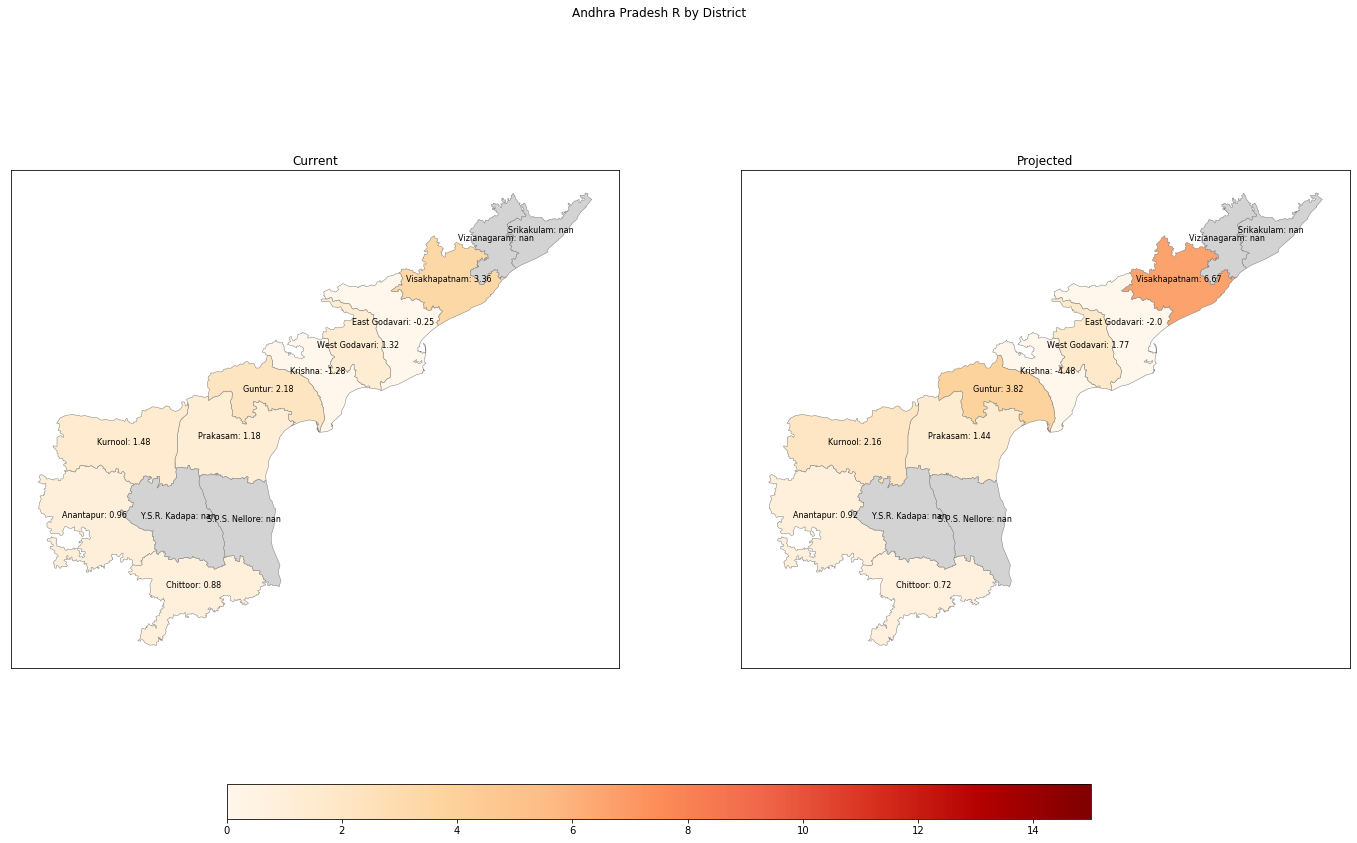

In [55]:
rdata = combine(state='andhrapradesh')
rmap(rdata)